# Exercise 3

All the imports we are going to need:

In [654]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Question 1a
1. Analyze the Manhattan rolling sales dataset. Where in Manhattan is the most/least expensive real estate located? What is the relationship between the sales price and gross square feet?

We start by loading in the Manhattan rolling sales dataset. 

In [655]:
dfManhattan = pd.read_excel(r'Datasets\rollingsales_manhattan.xls', skiprows=4)
dfManhattan.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376,24,,C0,264 EAST 7TH STREET,,...,3,0,3,2059,3696,1900,1,C0,7738700,2016-12-22
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,2016-12-14
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,2016-12-09
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,6300000,2016-08-04


For this question we need to clean the dataset and remove rows that have a value of 0 in the sale price column. It is also important to acknowledge that there are entries with a sale price of 1. One could argue that it does not feel realistic to sell real estate for 1. Since this dataset reguards real estate in Manhattan we can almost assume that the currency used for the dataset is american dollars. However, we can not assume what '1' means, the price data could be enterd in thousand dollars for example, which means a entry of '1' would acctually be '1 000'. Even if this is not the case there have been real estates sold for 1 dollar. This could be because the estate is heavily damaged and renovation costs could be high. 

In [656]:
dfManhattan = dfManhattan[dfManhattan['SALE PRICE'] != 0]

### Most Expensive

Most expensive real estate location in Manhattan:

In [657]:
mostExpensive = dfManhattan.sort_values(by='SALE PRICE', ascending=False)
mostExpensive.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12339,1,TRIBECA,21 OFFICE BUILDINGS,4,216,1,,O9,390 GREENWICH STREET,,...,0,4,4,172327,2354290,1989,4,O4,1767913114,2016-06-10
7418,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1291,10,,O4,550 MADISON AVENUE,,...,0,8,8,36803,827686,1983,4,O4,1400000000,2016-05-26
9690,1,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1004,29,,O4,1285 AVENUE OF THE AMER,,...,0,77,77,80333,1613847,1961,4,O4,1279624000,2016-05-20


Above we see the three most expensive real estate in the manhattan area. The most expensive real estate is a office building in the Tribeca neighborhood. 

### Least Expensive

To find the least expensive real estates location in Manhattan we first have to remove the rows without a selling price:

In [658]:

leastExpensiveNoZeros = dfManhattan[dfManhattan['SALE PRICE'] != 0]
leastExpensive = leastExpensiveNoZeros.sort_values(by='SALE PRICE', ascending=True)
leastExpensive.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4935,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2B,1753,49,,C4,46 EAST 129 STREET,,...,10,0,10,3747,14310,1910,2,C4,1,2016-06-08
13686,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1446,1176,,R4,308 EAST 72ND STREET,20C,...,1,0,1,0,0,0,2,R4,1,2017-02-13
697,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1110,,R4,257 WEST 17TH STREET,4A,...,1,0,1,0,0,0,2,R4,1,2016-09-27


As we can see there are multiple estates being sold for 1 dollar. We can count the amount and extract how many in each neighborhood. 

In [659]:
price1 = dfManhattan[dfManhattan['SALE PRICE'] == 1]

print('Number of real estates being sold for 1 dollar:', len(price1), '\n')

neighborhoodPrice1 = price1.groupby('NEIGHBORHOOD')['SALE PRICE'].count()
print('Number of real estate being sold for 1 dollar per neighborhood:\n', neighborhoodPrice1)

Number of real estates being sold for 1 dollar: 39 

Number of real estate being sold for 1 dollar per neighborhood:
 NEIGHBORHOOD
ALPHABET CITY                1
CHELSEA                      1
CLINTON                      2
GRAMERCY                     1
GREENWICH VILLAGE-CENTRAL    1
HARLEM-CENTRAL               4
HARLEM-EAST                  3
KIPS BAY                     2
LOWER EAST SIDE              1
MANHATTAN VALLEY             4
MIDTOWN WEST                 5
MURRAY HILL                  1
SOHO                         2
TRIBECA                      3
UPPER EAST SIDE (59-79)      3
UPPER EAST SIDE (79-96)      1
UPPER WEST SIDE (59-79)      1
UPPER WEST SIDE (96-116)     1
WASHINGTON HEIGHTS UPPER     2
Name: SALE PRICE, dtype: int64


So, there are not one least expensive real estate being sold, but multiple. At least one real estate in the listed neighborhoods is being sold at the lowest price of 1 dollar. 

### Most/Least expensive neighborhood

If we want to find the most or least expensive neighborhood we take the mean of every neighborhood and compare them as seen below. We can clearly see that Midtown CBD is the most expensive neighborhood in general and that Morningside Heights is the least expensive one. 

C:\Users\Sofia\AppData\Local\Temp\ipykernel_170616\434283189.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(neighborhoodPrices.index, rotation=90)


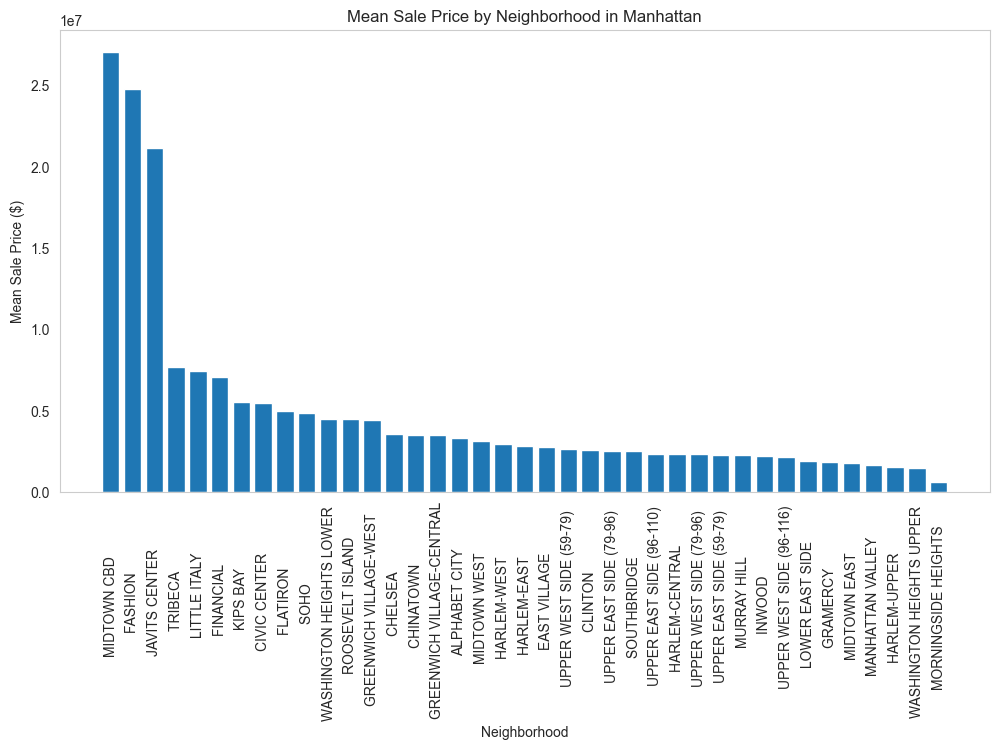

In [660]:
neighborhoodPrices = dfManhattan.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().sort_values(ascending=False)

# Create a bar chart of the mean sale price for each neighborhood
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(neighborhoodPrices.index, neighborhoodPrices.values)
ax.set_xticklabels(neighborhoodPrices.index, rotation=90)
ax.set_title('Mean Sale Price by Neighborhood in Manhattan')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Mean Sale Price ($)')
plt.grid(False)
# plt.show()

### Relationship between the sale price and gross square feet

To calculate the replationship between the sale price and gross square feet we start by removing real estates with missing values in the gross square feet column. 

In [661]:
dfManhattan = dfManhattan[dfManhattan['GROSS SQUARE FEET'] != 0]

<AxesSubplot: title={'center': 'Relationship between Sale Price and Gross Square Feet'}, xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

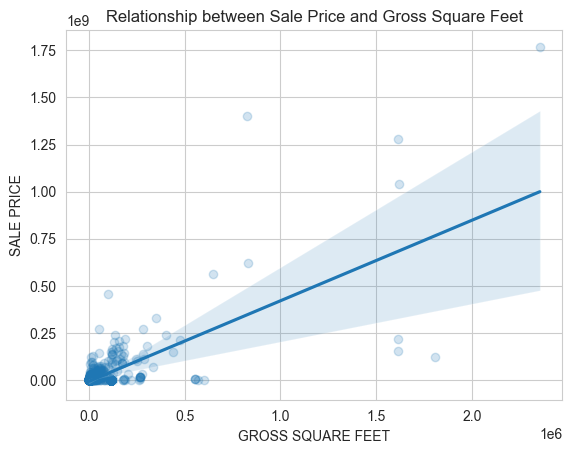

In [662]:
plt.title('Relationship between Sale Price and Gross Square Feet')
sns.regplot(data = dfManhattan, x='GROSS SQUARE FEET', y='SALE PRICE', scatter_kws={'alpha':0.2})

In [663]:
dfManhattan['SALE PRICE'].corr(dfManhattan['GROSS SQUARE FEET'])

0.6940502174751547

As we can see there are some outliers but there is a relationship between sale price and gross square feet. We can also see that slae price and gross square feet have a correlation of 0.69. 

## Question 1b

2. Analyze the 2012 Olympic dataset. What can you say about the relationship between a country’s population and the number of medals it wins? What can you say about the relationship between the ratio of female and male counts and the GDP of that country?

We start by loading in the 2012 Olympic dataset. 

In [664]:
dfOlympics = pd.read_csv(r'Datasets\olympics.csv')
dfOlympics.head()

,ISO country code,Country name,2011 GDP,2010 population,Female count,Male count,Gold medals,Silver medals,Bronze medals
0,USA,US,1.509400e+13,309349000,271,260,46,29,29
1,CHN,China,7.298100e+12,1338300000,208,163,38,27,23
2,JPN,Japan,5.867150e+12,127451000,162,141,7,14,17
3,DEU,Germany,3.570560e+12,81777000,176,219,11,19,14
4,FRA,France,2.773030e+12,64895000,148,187,11,11,12


### Relationship between a country's population and the number of medals. 

To see the relationship between a country's population and the number of medals won we start by creating a scatter plot. 

<AxesSubplot: xlabel='Total medals', ylabel='2010 population'>

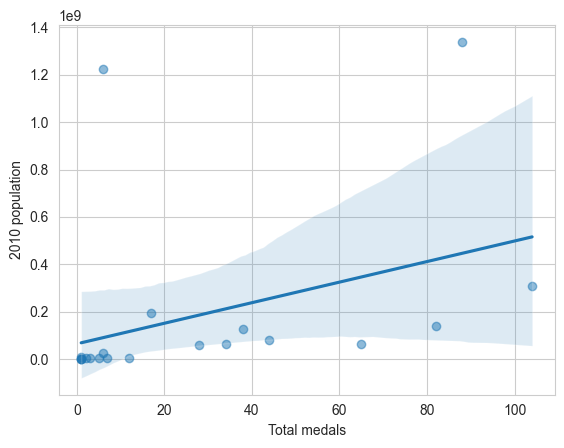

In [665]:
dfOlympics['Total medals'] = dfOlympics['Gold medals'] + dfOlympics['Silver medals'] + dfOlympics['Bronze medals']

sns.regplot(data = dfOlympics, x='Total medals', y='2010 population', scatter_kws={'alpha':0.5})

In [666]:
dfOlympics['2010 population'].corr(dfOlympics['Total medals'])

0.37113254710916704

As we can see the scatter plot shows two outliers but looking at the other datapoints we can see that countries with a larger population have more medals. If we look at the correlation of the two columns we see that it they do have pretty low correlation of about 0.37, the correlation would probably be higher if the outliers where not considerd. 

### Relationship between the ratio of female and male counts and the GDP of that country. 



<AxesSubplot: xlabel='Female/Male ratio', ylabel='2011 GDP'>

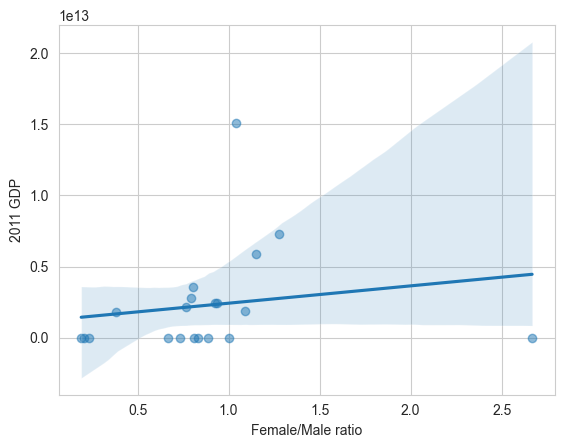

In [669]:
dfOlympics['Female/Male ratio'] = dfOlympics['Female count'] / dfOlympics['Male count']

sns.regplot(data=dfOlympics, x='Female/Male ratio', y='2011 GDP', scatter_kws={'alpha': 0.5})

As we can see, there is some kind of relationship between the two with two clear outliers. 

# Question 2

What is a time series? Explain the meaning of trends effects, seasonal variations, and random error.

A time